In [69]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\kellya\Documents\Python Code\python_for_coaches-main\python_for_coaches-main\Learning\december_data_science\day_1_files\CONTENT_INTERACTION\ViewingActivity.csv')

### Explore the df shape/content

In [70]:
df.shape

(9207, 10)

In [71]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,#whoruntheworld,2022-12-01 03:05:06,00:43:51,NaN,Wednesday: Season 1: Woe Is the Loneliest Numb...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:43:51,00:43:51,US (United States)
1,#whoruntheworld,2022-12-01 02:06:34,00:56:03,NaN,Wednesday: Season 1: Wednesday's Child Is Full...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:55:19,00:55:19,US (United States)
2,#whoruntheworld,2022-11-30 18:01:32,00:00:09,Autoplayed: user action: None;,Season 1 Clip: Snack VS. Chef,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:09,00:00:09,US (United States)
3,#whoruntheworld,2022-11-30 17:56:22,00:04:54,NaN,Our Universe: Season 1: Chasing Starlight (Epi...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:04:54,00:04:54,US (United States)
4,#whoruntheworld,2022-11-30 17:56:00,00:00:04,Autoplayed: user action: None;,Season 1 Clip: Snack VS. Chef,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:04,Not latest view,US (United States)


In [72]:
df.sample(n=10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
2400,#whoruntheworld,2021-09-20 18:38:39,00:43:04,NaN,Heartland: Season 12: Dare to Dream (Episode 1),NaN,Netflix Windows App - Cadmium Windows Mobile,00:43:45,00:43:45,US (United States)
6458,Adam & Nicole,2022-02-23 23:31:40,00:19:18,NaN,Spirit Riding Free: Season 2: Lucky and the Ch...,NaN,Google Chromecast V3 Streaming Stick,00:19:18,Not latest view,US (United States)
632,#whoruntheworld,2022-06-25 20:53:00,00:42:51,NaN,Shameless (U.S.): Season 1: But at Last Came a...,NaN,DefaultWidevineAndroidPhone,00:43:05,Not latest view,US (United States)
4776,#whoruntheworld,2020-06-04 01:20:32,00:41:39,NaN,Charmed: Season 2: The Rules of Engagement (Ep...,NaN,Android DefaultWidevineL3Phone Android Phone,00:42:04,00:42:04,US (United States)
3833,#whoruntheworld,2021-01-23 17:05:57,00:02:00,NaN,Fate: The Winx Saga: Season 1: No Strangers He...,NaN,DefaultWidevineAndroidPhone,00:14:46,Not latest view,US (United States)
4630,#whoruntheworld,2020-07-07 02:26:26,00:42:22,NaN,Wentworth: Season 1: The Girl Who Waited (Epis...,NaN,Android DefaultWidevineL3Phone Android Phone,00:44:03,00:44:03,US (United States)
7321,Adam & Nicole,2020-09-27 00:02:16,00:28:41,NaN,Chef's Table: BBQ: Volume 1: Rodney Scott (Epi...,NaN,Google Chromecast V3 Streaming Stick,00:39:08,00:39:08,US (United States)
5261,#whoruntheworld,2020-01-30 00:19:55,00:04:07,NaN,Next in Fashion: Season 1: Red Carpet (Episode 1),NaN,Android DefaultWidevineL3Phone Android Phone,00:04:07,Not latest view,US (United States)
726,#whoruntheworld,2022-06-02 00:11:15,00:11:50,NaN,Step Up 2: The Streets,NaN,DefaultWidevineAndroidPhone,00:11:50,00:11:50,FR (France)
50,#whoruntheworld,2022-11-22 00:35:43,00:00:16,NaN,Trailer: Christmas with You,TRAILER,Android DefaultWidevineL3Phone Android Phone,00:00:16,Not latest view,US (United States)


In [73]:
df["Profile Name"].unique()

array(['#whoruntheworld', 'Adam & Nicole', 'Adam Portuguese', 'Harper',
       'Kids'], dtype=object)

In [74]:
df["Device Type"].unique()

array(['Netflix Windows App - Cadmium Windows Mobile',
       'Android DefaultWidevineL3Phone Android Phone',
       'DefaultWidevineAndroidPhone',
       'Google Chromecast V3 Streaming Stick',
       'Google Chromecast streaming stick',
       'Google Smart Display Nest Hub 2018', 'Firefox PC (Cadmium)',
       'Edge OSS - Windows (Cadmium)', 'Chrome PC (Cadmium)',
       'Samsung 2015 NT14M DTV Smart TV'], dtype=object)

### Possible Questions for Data
##### Which Profile watched the most (time)?
##### Which Profile has the most watching activities/interactions?
##### What is the average watching time (per Profile)?
##### What devices are used by which Profile? And which device is used the most?
##### What was the most popular/watched title?
##### Was there any title watched by all profiles?
##### Can we recommend a title for one profile based on the common watching history of other profiles?

## Transform the data

In [75]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [76]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [77]:
df.sample(n=10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
7434,Adam & Nicole,2020-05-29 00:48:26+00:00,0 days 00:28:39,NaN,Nadiya’s Time to Eat: Season 1: Recipes in a R...,NaN,Google Chromecast V3 Streaming Stick,00:28:39,00:28:39,US (United States)
6018,Adam & Nicole,2022-11-12 21:48:34+00:00,0 days 01:37:11,NaN,A Boy Called Christmas,NaN,Google Chromecast V3 Streaming Stick,01:37:11,01:37:11,US (United States)
2978,#whoruntheworld,2021-07-30 19:18:10+00:00,0 days 00:53:24,NaN,The Twilight Saga: Breaking Dawn: Part 2,NaN,DefaultWidevineAndroidPhone,00:53:28,Not latest view,US (United States)
6146,Adam & Nicole,2022-07-17 20:51:48+00:00,0 days 00:12:28,NaN,Heartland: Season 14: Outsiders (Episode 5),NaN,Google Chromecast V3 Streaming Stick,00:33:02,Not latest view,US (United States)
2095,#whoruntheworld,2021-10-21 02:41:53+00:00,0 days 00:13:47,NaN,Headspace Guide to Sleep: Season 1: How to Sle...,NaN,Android DefaultWidevineL3Phone Android Phone,00:15:05,Not latest view,US (United States)
5520,#whoruntheworld,2019-11-25 00:42:40+00:00,0 days 00:21:52,NaN,Friends: Season 3: The One Where Ross & Rachel...,NaN,Android DefaultWidevineL3Phone Android Phone,00:22:33,00:22:33,US (United States)
7793,Adam & Nicole,2020-02-06 20:31:16+00:00,0 days 00:23:38,NaN,Jane The Virgin: Season 5: Chapter Ninety-Thre...,NaN,Google Chromecast V3 Streaming Stick,00:42:15,Not latest view,US (United States)
1513,#whoruntheworld,2022-01-22 03:28:24+00:00,0 days 00:00:12,NaN,Trailer: The Royal Treatment,TRAILER,Android DefaultWidevineL3Phone Android Phone,00:00:12,00:00:12,US (United States)
4042,#whoruntheworld,2020-11-24 12:30:04+00:00,0 days 00:08:21,NaN,The Great British Baking Show: Collection 8: P...,NaN,DefaultWidevineAndroidPhone,00:41:51,Not latest view,US (United States)
2079,#whoruntheworld,2021-11-03 21:20:19+00:00,0 days 02:03:04,NaN,Army of Thieves,NaN,DefaultWidevineAndroidPhone,02:03:05,02:03:05,US (United States)


## Answer Questions & Visualize the data

### Which Profile has the most watching activities/interactions?

In [78]:
df['Profile Name'].value_counts()

#whoruntheworld    5972
Adam & Nicole      2281
Adam Portuguese     482
Harper              461
Kids                 11
Name: Profile Name, dtype: int64

##### It appears that #whoruntheworld profile has the most view records.

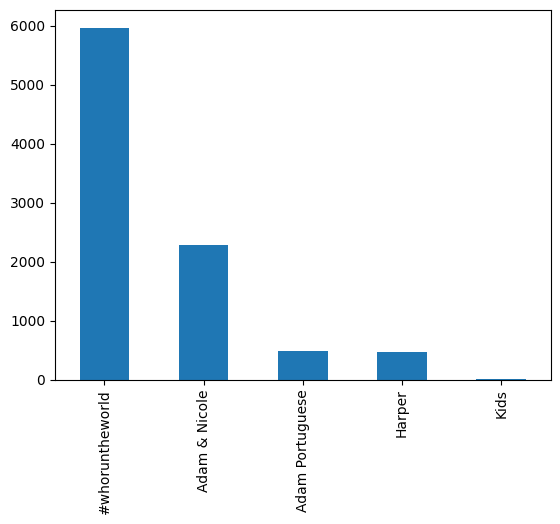

In [79]:
df['Profile Name'].value_counts().plot(kind='bar')
plt.show()

##### Which profile watched the most (time)?

In [80]:
df.Duration.sum()

Timedelta('147 days 02:56:47')

In [81]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
8252,Adam & Nicole,2019-08-08 22:52:58+00:00,0 days 00:00:36,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 2: Sha...,NaN,Android DefaultWidevineL3Phone Android Phone,00:00:36,00:00:36,US (United States)
8251,Adam & Nicole,2019-08-08 22:59:51+00:00,0 days 00:02:24,NaN,Arrow: Season 5: Lian Yu (Episode 23),NaN,Android DefaultWidevineL3Phone Android Phone,00:02:24,00:02:24,US (United States)
8250,Adam & Nicole,2019-08-08 23:05:59+00:00,0 days 00:42:30,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 1: T.R...,NaN,Google Chromecast V3 Streaming Stick,00:42:30,00:42:30,US (United States)
8249,Adam & Nicole,2019-08-08 23:50:50+00:00,0 days 00:08:13,NaN,Marvel's Agents of S.H.I.E.L.D.: Season 1: T.A...,NaN,Google Chromecast V3 Streaming Stick,00:08:59,Not latest view,US (United States)
5971,#whoruntheworld,2019-08-09 02:53:18+00:00,0 days 00:44:12,NaN,Queer Eye: Season 4: Without Further Ado (Epis...,NaN,Android DefaultWidevineL3Phone Android Phone,00:44:13,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...,...
8739,Harper,2022-12-01 13:30:41+00:00,0 days 00:00:02,NaN,Spirit Riding Free: Season 7: Lucky and the Th...,NaN,Android DefaultWidevineL3Phone Android Phone,00:00:01,Not latest view,US (United States)
8738,Harper,2022-12-01 13:31:13+00:00,0 days 00:22:48,NaN,Spirit Riding Free: Season 7: Lucky and the Th...,NaN,Google Chromecast V3 Streaming Stick,00:22:48,00:22:48,US (United States)
8737,Harper,2022-12-01 13:59:38+00:00,0 days 00:22:47,NaN,Spirit Riding Free: Season 7: Lucky and the Ra...,NaN,Google Chromecast V3 Streaming Stick,00:22:47,00:22:47,US (United States)
8736,Harper,2022-12-01 14:22:54+00:00,0 days 00:22:47,NaN,Spirit Riding Free: Season 7: Lucky and the Do...,NaN,Google Chromecast V3 Streaming Stick,00:22:47,00:22:47,US (United States)


In [82]:
for profile in df['Profile Name'].unique():
    print(profile)
    print(df.loc[df['Profile Name'] == f'{profile}', 'Duration'].sum())

#whoruntheworld
93 days 04:59:24
Adam & Nicole
44 days 11:39:55
Adam Portuguese
3 days 22:22:12
Harper
5 days 08:28:42
Kids
0 days 03:26:34


In [83]:
viewTime = {}
for profile in df['Profile Name'].unique():
    viewTime.update({f'{profile}': df.loc[df['Profile Name'] == f'{profile}', 'Duration'].astype('timedelta64[s]').sum()})

viewTime

{'#whoruntheworld': 8053164.0,
 'Adam & Nicole': 3843595.0,
 'Adam Portuguese': 339732.0,
 'Harper': 462522.0,
 'Kids': 12394.0}

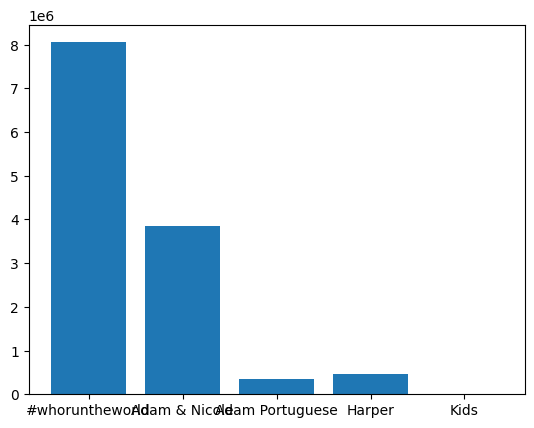

In [84]:
plt.bar(*zip(*viewTime.items()))
plt.show()

#### What is the average watching time (per Profile)?

In [85]:
for profile in df['Profile Name'].unique():
    print(df.loc[df['Profile Name']==f'{profile}','Duration'].sum()/(df.loc[df['Profile Name']==f'{profile}'].value_counts()))

Profile Name     Start Time                 Duration         Attributes                       Title                                                               Supplemental Video Type  Device Type                                   Bookmark  Latest Bookmark  Country           
#whoruntheworld  2021-07-18 02:36:34+00:00  0 days 00:00:05  Autoplayed: user action: None;   Trailer: Gunpowder Milkshake                                        TRAILER                  Firefox PC (Cadmium)                          00:00:05  Not latest view  US (United States)   93 days 04:59:24
                 2021-09-24 18:08:36+00:00  0 days 00:00:37  Autoplayed: user action: None;   Drama/Character Relationships Clip: Midnight Mass                   HOOK                     Netflix Windows App - Cadmium Windows Mobile  00:00:37  00:00:37         US (United States)   93 days 04:59:24
                 2022-06-22 01:15:23+00:00  0 days 00:01:09  Autoplayed: user action: None;   Main Character Intro Clip: Chic

In [86]:
df['Supplemental Video Type'].value_counts()

HOOK              537
TRAILER           278
PROMOTIONAL        78
TEASER_TRAILER     45
CINEMAGRAPH         9
RECAP               5
Name: Supplemental Video Type, dtype: int64

In [87]:
dff = df.loc[df['Supplemental Video Type'].isnull()]

In [88]:
dff['Profile Name'].value_counts()

#whoruntheworld    5093
Adam & Nicole      2236
Adam Portuguese     482
Harper              436
Kids                  8
Name: Profile Name, dtype: int64

In [92]:
for profile in dff['Profile Name'].unique():
    print(dff.loc[dff['Profile Name']==f'{profile}','Duration'].sum()/(dff.loc[dff['Profile Name']==f'{profile}'].value_counts()))

Series([], dtype: timedelta64[ns])
Series([], dtype: timedelta64[ns])
Series([], dtype: timedelta64[ns])
Series([], dtype: timedelta64[ns])
Series([], dtype: timedelta64[ns])


### What devices are used by which Profile? Which device is used the most?

In [90]:
df['Device Type'].value_counts()

DefaultWidevineAndroidPhone                     3429
Google Chromecast V3 Streaming Stick            2801
Android DefaultWidevineL3Phone Android Phone    2111
Netflix Windows App - Cadmium Windows Mobile     488
Samsung 2015 NT14M DTV Smart TV                   98
Google Smart Display Nest Hub 2018                88
Google Chromecast streaming stick                 72
Chrome PC (Cadmium)                               72
Firefox PC (Cadmium)                              37
Edge OSS - Windows (Cadmium)                      11
Name: Device Type, dtype: int64

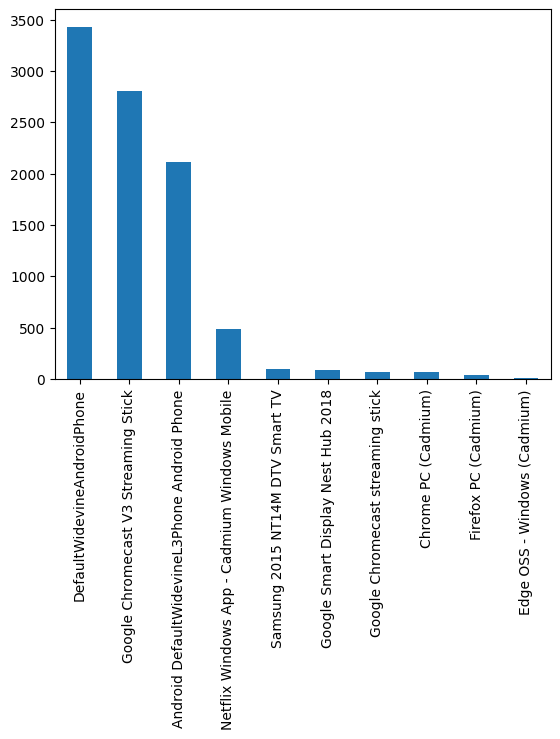

In [91]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()

### What was the most popular/watched title?

In [123]:
dff.Title.value_counts()

Charlie's Angels                                                         66
Ghostbusters: Answer the Call                                            43
The Man from U.N.C.L.E.                                                  38
The Spy Who Dumped Me                                                    35
6 Underground                                                            32
                                                                         ..
The Good Place: Season 3: The Book of Dougs (Episode 10)                  1
The Good Place: Season 3: Chidi Sees the Time-Knife (Episode 11)          1
MINDHUNTER: Season 1: Episode 1                                           1
Criminal Minds: Season 1: Plain Sight (Episode 4)                         1
The Boss Baby: Back in Business: Season 1: Scooter Buskie (Episode 1)     1
Name: Title, Length: 3465, dtype: int64

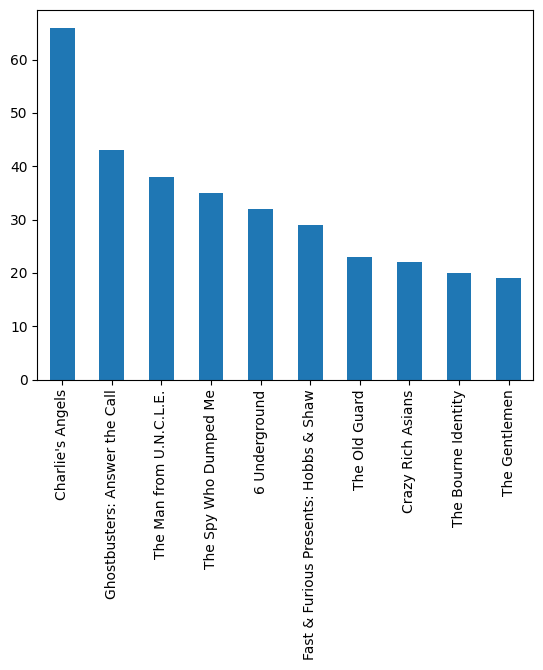

In [126]:
dff['Title'].value_counts().nlargest(10).plot(kind='bar')
plt.show()